In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier

import pickle

In [2]:
df = pd.read_csv("train_set.csv").drop(['Unnamed: 0'],axis =1)
#df.head()

In [3]:
df1 = pd.read_csv('test_set.csv').drop(['Unnamed: 0'],axis = 1)
#df.head()

In [5]:
le = LabelEncoder()
le1 = LabelEncoder()
le2 = LabelEncoder()
one_hot = OneHotEncoder()
scaler = StandardScaler()

In [5]:
df['wage'] = df['wage_class'].str.replace('<=50K', '0').str.replace('>50K', '1').astype(int)
df1['wage'] = df1['wage_class'].str.replace('<=50K', '0').str.replace('>50K', '1').astype(int)

In [7]:
df['encoded_workclass'] = le.fit_transform(df['workclass'])
df1['encoded_workclass'] = le.transform(df1['workclass'])

In [8]:
df['encoded_occupation'] = le1.fit_transform(df['occupation'])
df1['encoded_occupation'] = le1.transform(df1['occupation'])

In [9]:
df['encoded_race'] = le2.fit_transform(df['race'])
df1['encoded_race'] = le2.transform(df1['race'])

In [10]:
df['encoded_sex'] =df['sex'].map({' Male':'0',' Female': '1'}).astype(int)
df1['encoded_sex'] =df1['sex'].map({' Male':'0',' Female': '1'}).astype(int)

In [11]:
df = df.drop(['workclass','occupation','race','sex', 'wage_class', 'education'],axis = 1)
df1 = df1.drop(['workclass','occupation','race','sex', 'wage_class', 'education'],axis = 1)

In [18]:
df.head(2)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,wage,encoded_workclass,encoded_occupation,encoded_race,...,45,46,47,48,49,50,51,52,53,54
0,0.030671,-1.063611,13,0.148453,-0.21666,-0.035429,0,7,1,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.837109,-1.008707,13,-0.145920,-0.21666,-2.222153,0,6,4,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [19]:
df1.head(2)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,wage,encoded_workclass,encoded_occupation,encoded_race,...,45,46,47,48,49,50,51,52,53,54
0,-2.826272,-1.798033,13,-0.14590,-0.217197,-3.277889,0,6,4,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-2.767150,-1.798032,9,-0.14594,-0.217197,-3.454992,0,4,6,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [14]:
non_ordinal = ['marital_status','relationship', 'native_country']
df_one_hot = pd.DataFrame(one_hot.fit_transform(df[non_ordinal]).toarray())
df1_one_hot = pd.DataFrame(one_hot.transform(df1[non_ordinal]).toarray())

In [16]:
df =df.join(df_one_hot).drop(['marital_status','relationship','native_country'],axis = 1)
df1 =df1.join(df1_one_hot).drop(['marital_status','relationship','native_country'],axis = 1)

In [17]:
num = ['age','fnlwgt','capital_gain','capital_loss','hours_per_week']
scaled_x_train = scaler.fit_transform(df[num])
df[num] = pd.DataFrame(scaled_x_train,columns = num)

scaled_x_test = scaler.transform(df[num])
df1[num] = pd.DataFrame(scaled_x_test,columns = num)

In [20]:
X_train = df.drop(['wage'],axis = 1)
y_train = df['wage']

X_test = df.drop(['wage'],axis = 1)
y_test = df['wage']

In [ ]:
# non_ordinal = ['marital_status','relationship', 'native_country']

# df['wage'] = df['wage_class'].str.replace('<=50K', '0').str.replace('>50K', '1').astype(int)
# df['encoded_workclass'] = le.fit_transform(df['workclass'])
# df['encoded_occupation'] = le.fit_transform(df['occupation'])
# df['encoded_race'] = le.fit_transform(df['race'])
# df['encoded_sex'] =df['sex'].map({' Male':'0',' Female': '1'}).astype(int)
# df = df.drop(['workclass','occupation','race','sex', 'wage_class', 'education'],axis = 1)
# df2 = pd.DataFrame(one_hot.fit_transform(df[non_ordinal]).toarray())
# df =df.join(df2).drop(['marital_status','relationship','native_country'],axis = 1)
# scaled_x = scaler.fit_transform(df[['age','fnlwgt','capital_gain','capital_loss','hours_per_week']])
# df[['age','fnlwgt','capital_gain','capital_loss','hours_per_week']] = pd.DataFrame(scaled_x,columns = ['age','fnlwgt','capital_gain','capital_loss','hours_per_week'])

### main

In [ ]:
df.head()

<AxesSubplot:>

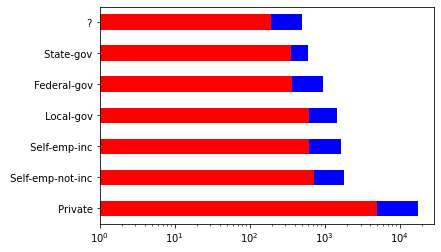

In [6]:
df['workclass'][df['wage'] == 0].value_counts().plot(kind = 'barh',log = True, color = 'blue')
df['workclass'][df['wage'] == 1].value_counts().plot(kind = 'barh',log = True, color = 'red')

<AxesSubplot:>

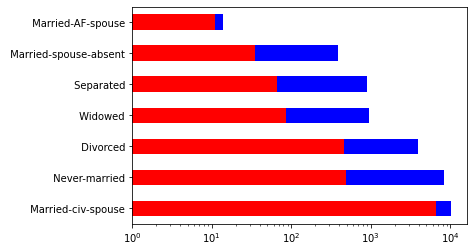

In [7]:
df['marital_status'][df['wage'] == 0].value_counts().plot(kind = 'barh',log = True, color = 'blue')
df['marital_status'][df['wage'] == 1].value_counts().plot(kind = 'barh',log = True, color = 'red')

<AxesSubplot:>

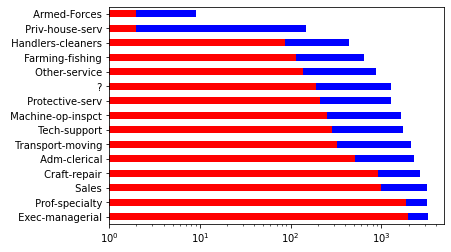

In [8]:
df['occupation'][df['wage'] == 0].value_counts().plot(kind = 'barh',log = True, color = 'blue')
df['occupation'][df['wage'] == 1].value_counts().plot(kind = 'barh',log = True, color = 'red')

<AxesSubplot:>

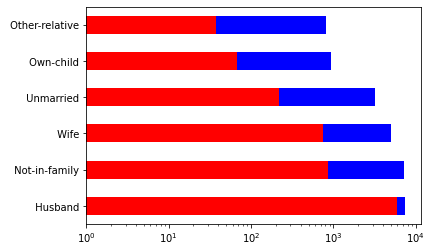

In [9]:
df['relationship'][df['wage'] == 0].value_counts().plot(kind = 'barh',log = True, color = 'blue')
df['relationship'][df['wage'] == 1].value_counts().plot(kind = 'barh',log = True, color = 'red')

<AxesSubplot:>

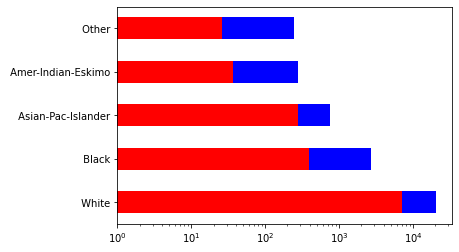

In [10]:
df['race'][df['wage'] == 0].value_counts().plot(kind = 'barh',log = True, color = 'blue')
df['race'][df['wage'] == 1].value_counts().plot(kind = 'barh',log = True, color = 'red')

In [ ]:
#df.to_csv('encoded.csv')

### XGBOOST

In [21]:
model = XGBClassifier(objective = 'binary:logistic')
model.fit(X_train,y_train)

C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:49:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [22]:
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred)

print('The Accuracy Score:', acc)

The Accuracy Score: 0.9017229200577378


In [23]:
pickle.dump(le, open('label_enc_workclass.pkl', 'wb'))
pickle.dump(le1, open('label_enc1_occupation.pkl', 'wb'))
pickle.dump(le2, open('label_enc2_race.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(one_hot, open('one_hot.pkl', 'wb'))
pickle.dump(model,open('xgboost.pkl', 'wb'))

In [24]:
df.to_csv('train_encoded.csv')
df.to_csv('test_encoded.csv')